In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive/')
os.chdir('/content/drive/My Drive/Colab Notebooks/Python/sample')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!ls

data.pickle  data.txt  demofile.txt  sample.json


# Nội dung
1. Các thao tác với tệp

  *   Đọc ghi tệp văn bản
  *   Làm việc với tệp dạng JSON với thư viện json, dạng nhị phân với thư viện pickle
2. Quản lý và xử lý ngoại lệ














#1. Mở tệp

* Để mở tệp chúng ta sử dụng hàm open().
* Các chế độ mở tệp gồm:
  * "**r**"*–Read* –Đây là giá trị mặc định của hàm open(). Thực hiện mở tệp để đọc, có lỗi nếu tệp không tồn tại
  * "**a**"*–Append* –Mở một tệp để ghi thêm dữ liệu vào cuối tệp, tạo tệp mới nếu tệp chưa tồn tại
  * "**w**"-*Write* –Mở tệp để ghi, tạo tệp mới nếu tệp chưa tồn tại
  * "**x**"-*Create* –Tạo một tệp cụ thể, trả lại lỗi nếu tệp đã tồn tại

* Tham số xác định kiểu tệp
  * "**t**"-*Text* -Default value. Tệp văn bản
  * "**b**"-*Binary* –Tệp nhị phân (ví dụ như tệp hình ảnh)




In [ ]:
# Ví dụ mở tệp

f = open(r"demofile.txt")

# Câu lệnh trên tương đương với câu lệnh dưới đây

f = open("demofile.txt", "rt")


In [ ]:
f = open("demofile.txt",'wt',encoding='utf-8')
f.write('Dòng x\nDòng 2\nDòng 3\nLine 4\nLine 5')
f.close()


In [ ]:
!cat demofile.txt


Dòng x
Dòng 2
Dòng 3
Line 4
Line 5

## Đọc tệp

Để đọc dữ liệu từ tệp, trước tiên bạn cần mở tệp để đọc thông qua hàm **open**(), hàm open sẽ trả lại một đối tượng tệp (file object), đối tượng tệp có phương thức **read**() để đọc nội dung của tệp.

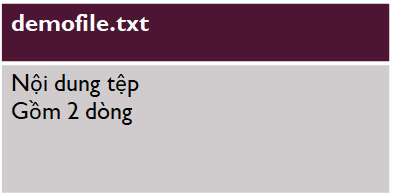

In [ ]:
f = open("demofile.txt", 'rt')
print(f.read())

# Ná»™i dung tá»‡p
# Gá»“m 2 dÃ²ng

LookupError: ignored

## Đọc tệp chứa dữ liệu unicode
Để đọc file với nội dung chứa dữ liệu Unicode (ví dụ utf-8), thêm tham số
***encoding="utf-8"*** khi mở tệp.



In [ ]:
f = open("demofile.txt", "rt", encoding="utf-8")
print(f.read())

Dòng x
Dòng 2
Dòng 3
Line 4
Line 5


Mặc định thì phương thức read() trả lại nội dung của cả tệp, tuy nhiên chúng ta có thể chỉ thị cho phương thức chỉ lấy ra một số ký tự nhất định.

In [ ]:
f = open("demofile.txt","r", encoding="utf-8")
print(f.read(5))

Nội d


## readline()

Để đọc nội dung tệp theo từng dòng ta có thể dùng phương thức readline()


In [ ]:
f = open("demofile.txt","r", encoding="utf-8")
print(f.readline()) #Nội dung tệp\n
print(f.readline()) #Gồm 2 dòng\n

# Sau khi làm việc xong với tệp thì nên đóng tệp thông qua phương thức close()

f.close()

True
Dòng 2



## Ghi dữ liệu vào tệp
Để ghi dữ liệu vào tệp thì việc trước tiên cần làm là mở tệp với chế độ ghi,
có 2 chế độ cho việc ghi tệp là thêm dữ liệu vào cuối tệp và ghi đè dữ mới liệu vào tệp.

In [ ]:
# Thêm dữ liệu vào cuối tệp

f = open(r"demofile.txt", "w",encoding ='utf-8')
f.write('Nội dung tệp\nGồm 2 dòng\nThêm 1 dòng nữa là 3\n')
f.close()

In [ ]:

f = open('demofile.txt','r',encoding = 'utf-8')
print(f.read())
f.close()

Nội dung tệp
Gồm 2 dòng
Thêm 1 dòng nữa là 3



In [ ]:
# Ghi đè dữ liệu mới vào tệp

f = open("demofile.txt", "w",encoding ='utf-8')
f.write('Dữ liệu đã bị ghi đè')
f.close()
f = open('demofile.txt','r',encoding = 'utf-8')
print(f.read())



Dữ liệu đã bị ghi đè


## Duyệt tệp

Để thuận tiện trong việc đọc tệp, ta có thể duyệt các từng dòng trong tệp theo một số cách sau

In [ ]:
f = open('demofile.txt','w',encoding = 'utf-8')
f.write('Dòng 1\nDòng 2\nDòng 3\n')
f.close()

f = open('demofile.txt','r',encoding = 'utf-8')
print(f.read())


Dòng 1
Dòng 2
Dòng 3



In [ ]:
f = open('demofile.txt', encoding='utf-8')

for line in f:
  print(line.strip()=='Dòng 1')
  print('|'+line+'|') # Dùng phương thức strip() để loại bỏ ký tự xuống dòng
  print(len(line))

f.close()

True
|Dòng 1
|
7
False
|Dòng 2
|
7
False
|Dòng 3
|
7


In [ ]:
for line in open('demofile.txt', encoding = 'utf-8'):
  print(line, end='')

Dòng 1
Dòng 2
Dòng 3


In [ ]:
f = open('demofile.txt', encoding = 'utf-8')
lines = f.readlines() #-> list of lines

print(lines)

for i in range(len(lines)):
  print(lines[i])

f.close()

['Dòng 1\n', 'Dòng 2\n', 'Dòng 3\n']
Dòng 1

Dòng 2

Dòng 3



In [ ]:
with open('data.txt', 'w') as f:
  data = 'some data to be written to the file'
  f.write(data)

with open('data.txt', 'r') as f:
  data = f.read()
  print(data)


some data to be written to the file


## Xóa tệp

Để xóa tệp ta có thể dùng hàm **remove()** trong module **os**


In [ ]:
import os


if os.path.exists("demofile.txt"):
  os.remove("demofile.txt")
else:
  print("The file does not exist")

if os.path.exists("myfolder"):
  os.rmdir("myfolder")
else:
  os.mkdir("myfolder")
  print("The folder does not exist")


The file does not exist


## Tệp JSON

Để đọc và ghi file định dạng JSON ta có thể dùng module json với hàm load() và dump()

In [ ]:
import json
x = [
  {
  "name" : "Emil",
  "year" : 2004
  },
   {
  "name" : "Tobias",
  "year" : 2007
  },
  {
  "name" : "Linus",
  "year" : 2011
  },
  {
      "name": "Sinh viên Tự nhiên",
      "year":2021
  }
]


f = open('sample.json','wt', encoding='utf-8')
json.dump(x, f, ensure_ascii=True)

f = open('sample.json','rt', encoding='utf-8')
x = json.load(f)
print(x)
# print(x.get('child'))
print(type(x))


[{'name': 'Emil', 'year': 2004}, {'name': 'Tobias', 'year': 2007}, {'name': 'Linus', 'year': 2011}, {'name': 'Sinh viên Tự nhiên', 'year': 2021}]
<class 'list'>


In [ ]:
!cat sample.json

[{"name": "Emil", "year": 2004}, {"name": "Tobias", "year": 2007}, {"name": "Linus", "year": 2011}, {"name": "Sinh viên Tự nhiên", "year": 2021}]

In [ ]:
!cat sample.json


[{"name": "Emil", "year": 2004}, {"name": "Tobias", "year": 2007}, {"name": "Linus", "year": 2011}, {"name": "Sinh vi\u00ean T\u1ef1 nhi\u00ean", "year": 2021}]

## Làm việc với tệp nhị phân

Ta có thể đọc và ghi các đối tượng trong Python ra file nhị phân với module pickle.

In [ ]:
import pickle
data = {
  'a': [1, 2.0, 3, 4+6j],
  'b': ("character string", b"byte string"),
  'c': {None, True, False}
}
with open('data.pickle', 'wb') as f:
  pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

with open('data.pickle', 'rb') as f:
  data = pickle.load(f)
  print(data)
  print(type(data))

{'a': [1, 2.0, 3, (4+6j)], 'b': ('character string', b'byte string'), 'c': {None, True, False}}
<class 'dict'>


In [ ]:
!less data.pickle

<80>^D<95>y^@^@^@^@^@^@^@}<94>(<8C>^Aa<94>]<94>(K^AG@^@^@^@^@^@^@^@K^C<8C>^Hbuil tins<94><8C>^Gcomplex<94><93><94>G@^P^@^@^@^@^@^@G@^X^@^@^@^@^@^@<86><94>R<94>e
<8C>^Ab<94><8C>^Pcharacter string<94>C^Kbyte string<94><86><94><8C>^Ac<94><8F>
<94>(N<88><89><90>u.
>8

# Quản lý lỗi

Có hai loại lỗi có thể gặp phải khi viết chương trình là:
* Lỗi cú pháp (Syntax Errors)
* Lỗi ngoại lệ (Exceptions)


In [ ]:
# Các lỗi cú pháp thường gặp khi mới học ngôn ngữ, hoặc mới lập trình
# Các lỗi này là lỗi nghiêm trọng, trình thông dịch sẽ phân tích cú pháp
# các câu lệnh và đưa ra thông báo nếu có lỗi cú pháp, chương trình
# không thể thực thi nếu có lỗi cú pháp

while True print('Hello world')


SyntaxError: ignored

## Ngoại lệ

Ngay cả khi một câu
lệnh đúng về cú pháp
thì cũng có thể xảy ra
lỗi khi thực thi. Lỗi được
phát hiện khi thực thi
được gọi là Ngoại lệ.

In [ ]:
#a/b
10 * (1/0)

ZeroDivisionError: ignored

In [ ]:
4 + spam * 3

NameError: ignored

In [ ]:
'2' + 2

TypeError: ignored

## Xử lý ngoại lệ
* Người lập trình cần xử
lý các ngoại lệ gặp phải
khi xây dựng các
chương trình.

* Các lỗi ngoại lệ có thể
được xử lý bằng lệnh
 **try** / **except**


In [ ]:
while True:
  try:
    x = int(input("Nhập vào một số nguyên: "))
    print(unknow_var)
    break
  except:
    print("Bạn cần nhập vào một số nguyên")



Nhập vào một số nguyên: 8.6
Bạn cần nhập vào một số nguyên
Nhập vào một số nguyên: c
Bạn cần nhập vào một số nguyên
Nhập vào một số nguyên: 9
Bạn cần nhập vào một số nguyên
Bạn cần nhập vào một số nguyên
Bạn cần nhập vào một số nguyên
Bạn cần nhập vào một số nguyên
Bạn cần nhập vào một số nguyên


In [ ]:
print(unknow_var)

NameError: name 'unknow_var' is not defined

##  Try/except

Lệnh **try** hoạt động như sau:
* Đầu tiên, các lệnh nằm giữa **try** và **except** sẽ được thực thi
* Nếu không có ngoại lệ nào xảy ra, các lệnh trong khối **except** sẽ được bỏ qua, và các lệnh
trong **try** sẽ được hoàn tất.
* Nếu có ngoại lệ xảy ra, các câu lệnh phía sau lệnh gây ra ngoại lệ sẽ không được thực thi. Khi
đó nếu ngoại lệ trùng với loại ngoại lệ được liệt kê phía sau từ khóa **except** thì các lệnh
trong khối except sẽ được thực thi, và chương trình thực thi các lệnh phía sau **try/except**
* Nếu ngoại lệ xảy ra mà không trùng với các loại ngoại lệ được liệt kê sau **except**, trình thực
thi sẽ dừng lại và lỗi sẽ trả lại thông báo lỗi.

* Một lệnh **try** có thể có nhiều hơn một mệnh đề **except** để thực hiện những xử lý riêng cho từng
loại ngoại lệ. Tuy nhiên chỉ có nhiều nhất là một xử lý được thực thi tại một thời điểm.

## Đẩy ra ngoại lệ
Lệnh raise cho phép
người lập trình đẩy ra một
ngoại lệ.


In [ ]:
raise NameError('HiThere')


NameError: ignored

In [ ]:
try:
  raise NameError('HiThere')
except NameError:
  print('An exception flew by!')
  # raise

An exception flew by!


## Ngoại lệ do người dùng định nghĩa

Ngoài các ngoại lệ có sẵn, người lập trình có thể tự định nghĩa các ngoại lệ bằng cách kế thừa từ các lớp ngoại lệ đã được xây dựng sẵn trong Python.
[Ngoại lệ trong Python](https://docs.python.org/3/library/exceptions.html)

In [ ]:
def classtree(cls, indent=0):
    print ('.' * indent, cls.__name__)
    for subcls in cls.__subclasses__():
        classtree(subcls, indent + 2)

classtree(BaseException)

In [ ]:
class SalaryNotInRangeError(Exception):
    """Exception raised for errors in the input salary.

    Attributes:
        salary -- input salary which caused the error
        message -- explanation of the error
    """

    def __init__(self, salary, message="Salary is not in (5000, 15000) range"):
        self.salary = salary
        self.message = message
        super().__init__(self.message)

    def __str__(self):
        return f'{self.salary} -> {self.message}'


salary = int(input("Enter salary amount: "))
if not 5000 < salary < 15000:
    raise SalaryNotInRangeError(salary,"Out of range")

Enter salary amount: 123


SalaryNotInRangeError: ignored

## Dọn dẹp (clean-up)
Các lệnh trong
khối **finally** sẽ
luôn được thực
thi trong mọi
hoàn cảnh


In [ ]:
try:
  raise KeyboardInterrupt
finally:
  print('Goodbye, world!')

Goodbye, world!


KeyboardInterrupt: ignored

In [ ]:
def divide(x, y):
  try:
      result = x / y
  except:
      print("division by zero!")
  # except TypeError:
  #     print('Type error....')
  else:
      print("result is", result)
  finally:
      print("executing finally clause")

# divide(2, 1)

divide(2, 0)

divide("2", "1")

division by zero!
executing finally clause
division by zero!
executing finally clause
